In [1]:
# Importing the libs
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Importing the data
ibov_data = yf.Ticker("BOVV11.SA")

In [3]:
ibov_df = pd.DataFrame(ibov_data.history(period="max"))

In [59]:
ibov_df['Date'] = pd.to_datetime(ibov_df.index, format='%Y-%m-%d').date

In [60]:
ibov_df.index = ibov_df['Date']

In [4]:
ibov_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-08-01 00:00:00-03:00,57.250000,57.250000,57.250000,57.250000,0,0.0,0.0
2016-08-02 00:00:00-03:00,56.650002,56.650002,56.650002,56.650002,0,0.0,0.0
2016-08-04 00:00:00-03:00,57.590000,57.590000,57.590000,57.590000,1000,0.0,0.0
2016-08-05 00:00:00-03:00,57.500000,57.660000,57.500000,57.660000,1060,0.0,0.0
2016-08-09 00:00:00-03:00,57.680000,57.680000,57.680000,57.680000,1000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-30 00:00:00-03:00,137.339996,138.929993,137.339996,138.699997,2424303,0.0,0.0
2024-09-02 00:00:00-03:00,138.300003,138.410004,137.259995,137.500000,1435484,0.0,0.0
2024-09-03 00:00:00-03:00,138.240005,138.240005,136.850006,137.070007,1791073,0.0,0.0


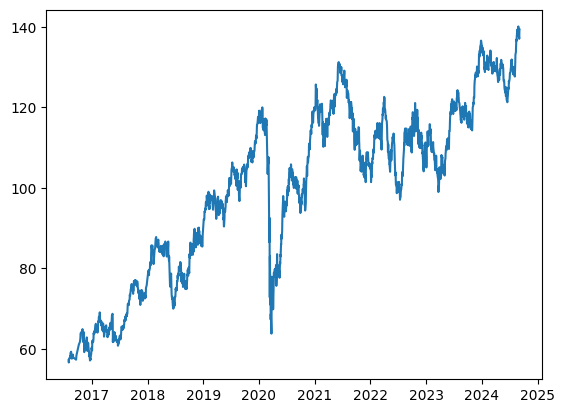

In [62]:
plt.plot(ibov_df.index, ibov_df['Close'])
plt.show()

In [63]:
del ibov_df['Dividends']
del ibov_df['Stock Splits']

In [64]:
ibov_df.index

Index([2016-08-01, 2016-08-02, 2016-08-04, 2016-08-05, 2016-08-09, 2016-08-11,
       2016-08-12, 2016-08-15, 2016-08-16, 2016-08-17,
       ...
       2024-08-23, 2024-08-26, 2024-08-27, 2024-08-28, 2024-08-29, 2024-08-30,
       2024-09-02, 2024-09-03, 2024-09-04, 2024-09-05],
      dtype='object', name='Date', length=1953)

In [65]:
ibov_df.set_index(pd.to_datetime(ibov_df.index, format='%m-%d-%Y'), inplace=True)
ibov_df_close = ibov_df.Close
ibov_df_close

Date
2016-08-01     57.250000
2016-08-02     56.650002
2016-08-04     57.590000
2016-08-05     57.660000
2016-08-09     57.680000
                 ...    
2024-08-30    138.699997
2024-09-02    137.500000
2024-09-03    137.070007
2024-09-04    139.080002
2024-09-05    139.369995
Name: Close, Length: 1953, dtype: float64

In [66]:
results = seasonal_decompose(x=ibov_df_close, period=365)

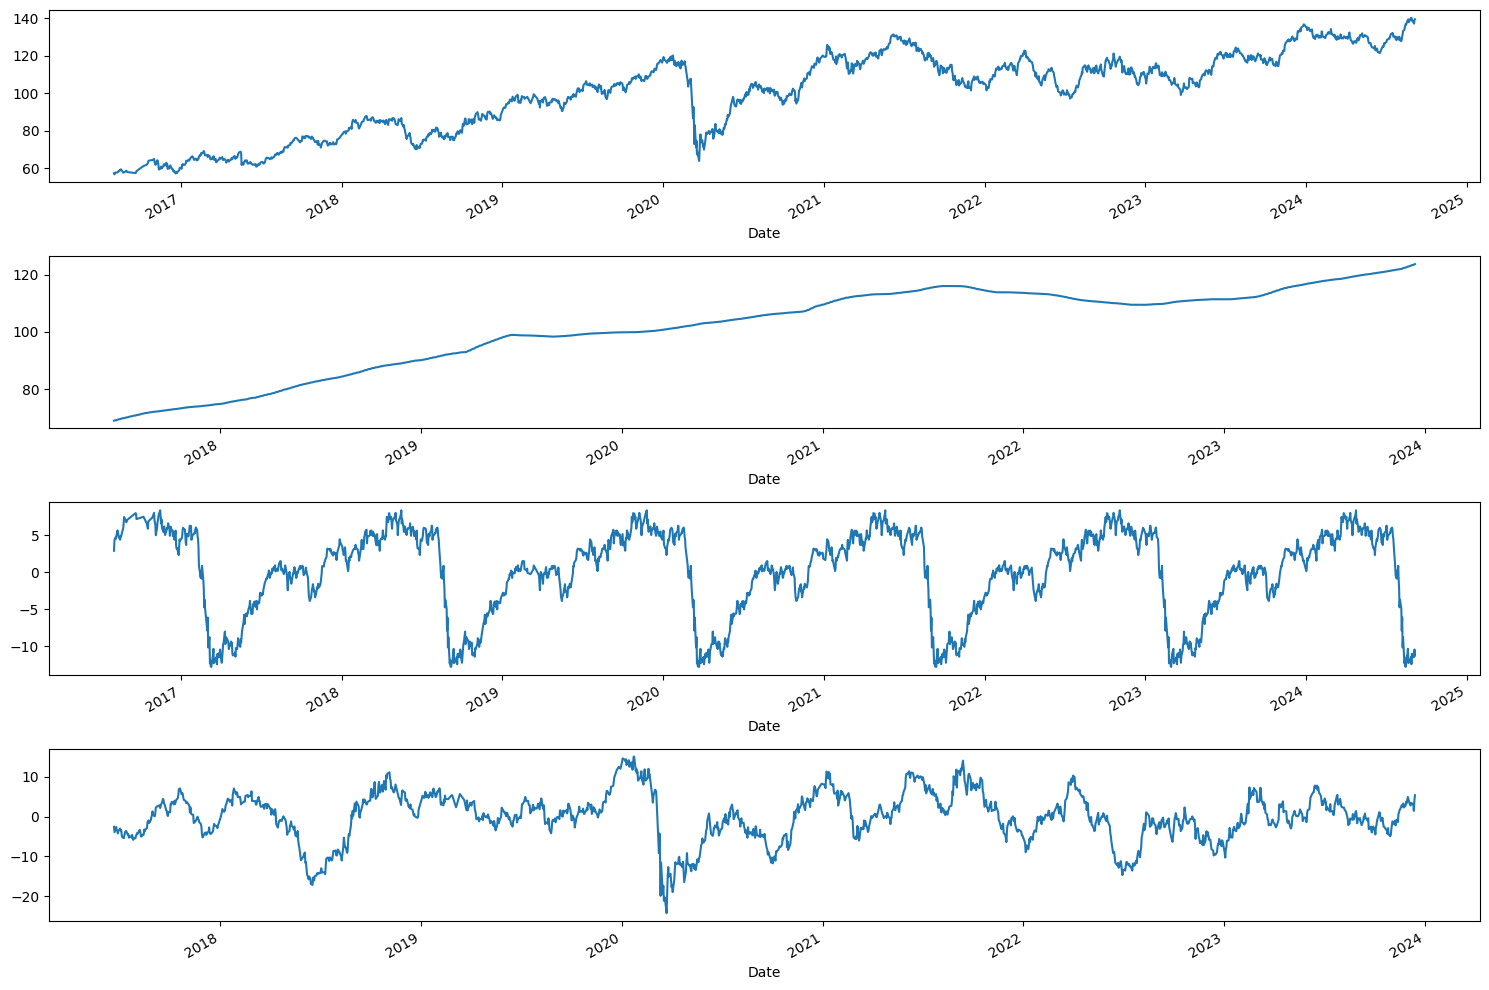

In [67]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

results.observed.plot(ax=ax1)
results.trend.plot(ax=ax2)
results.seasonal.plot(ax=ax3)
results.resid.plot(ax=ax4)

plt.tight_layout()

In [68]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [69]:
X = ibov_df_close.values

In [70]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.6790183562487233
P-Value: 0.4419539777583804
Valores críticos:
	1%: -3.4337165559544514
	5%: -2.8630271400760288
	10%: -2.567561693684287


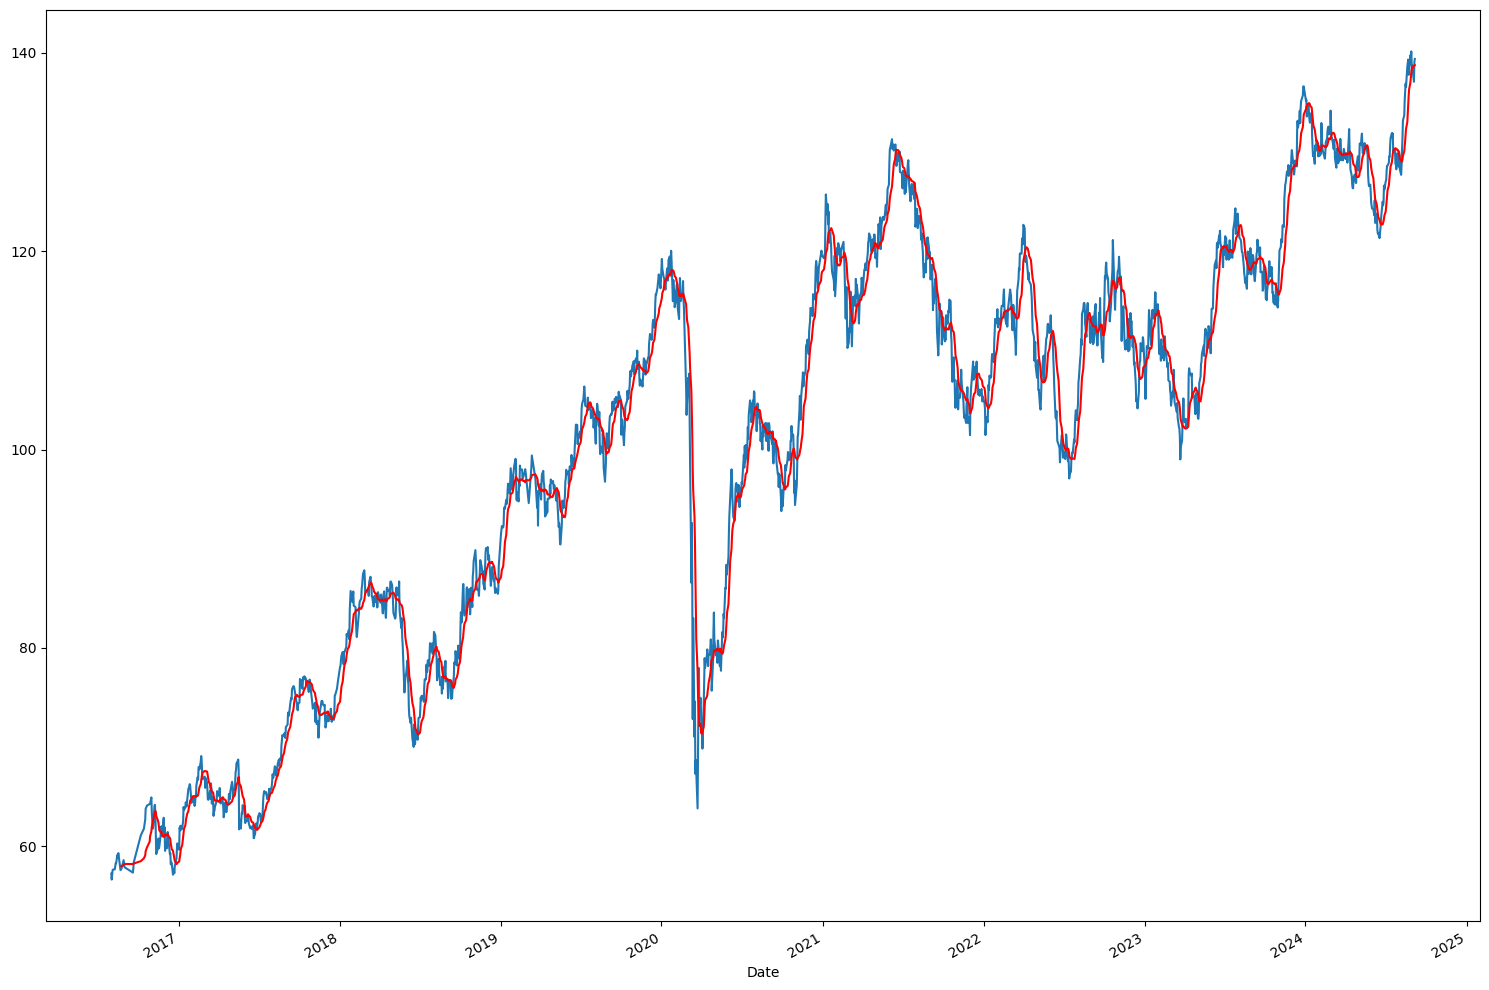

In [71]:
ma = ibov_df_close.rolling(12).mean()

f, ax = plt.subplots(figsize = (15,10))
ibov_df_close.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

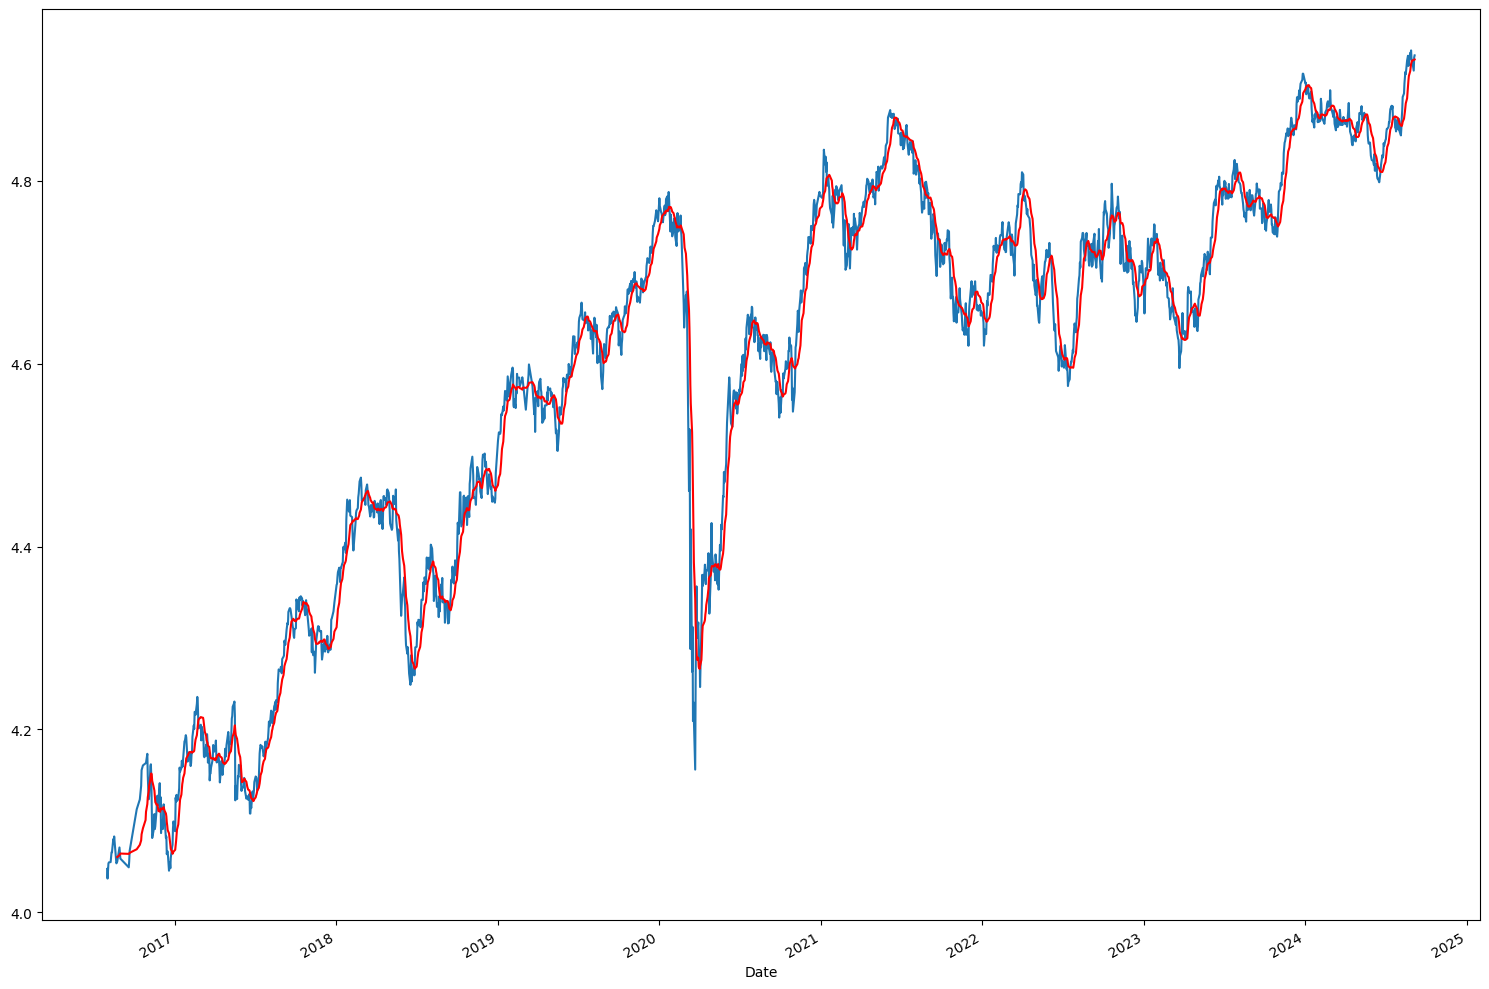

In [72]:
df_log = np.log(ibov_df_close)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots(figsize = (15,10))
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

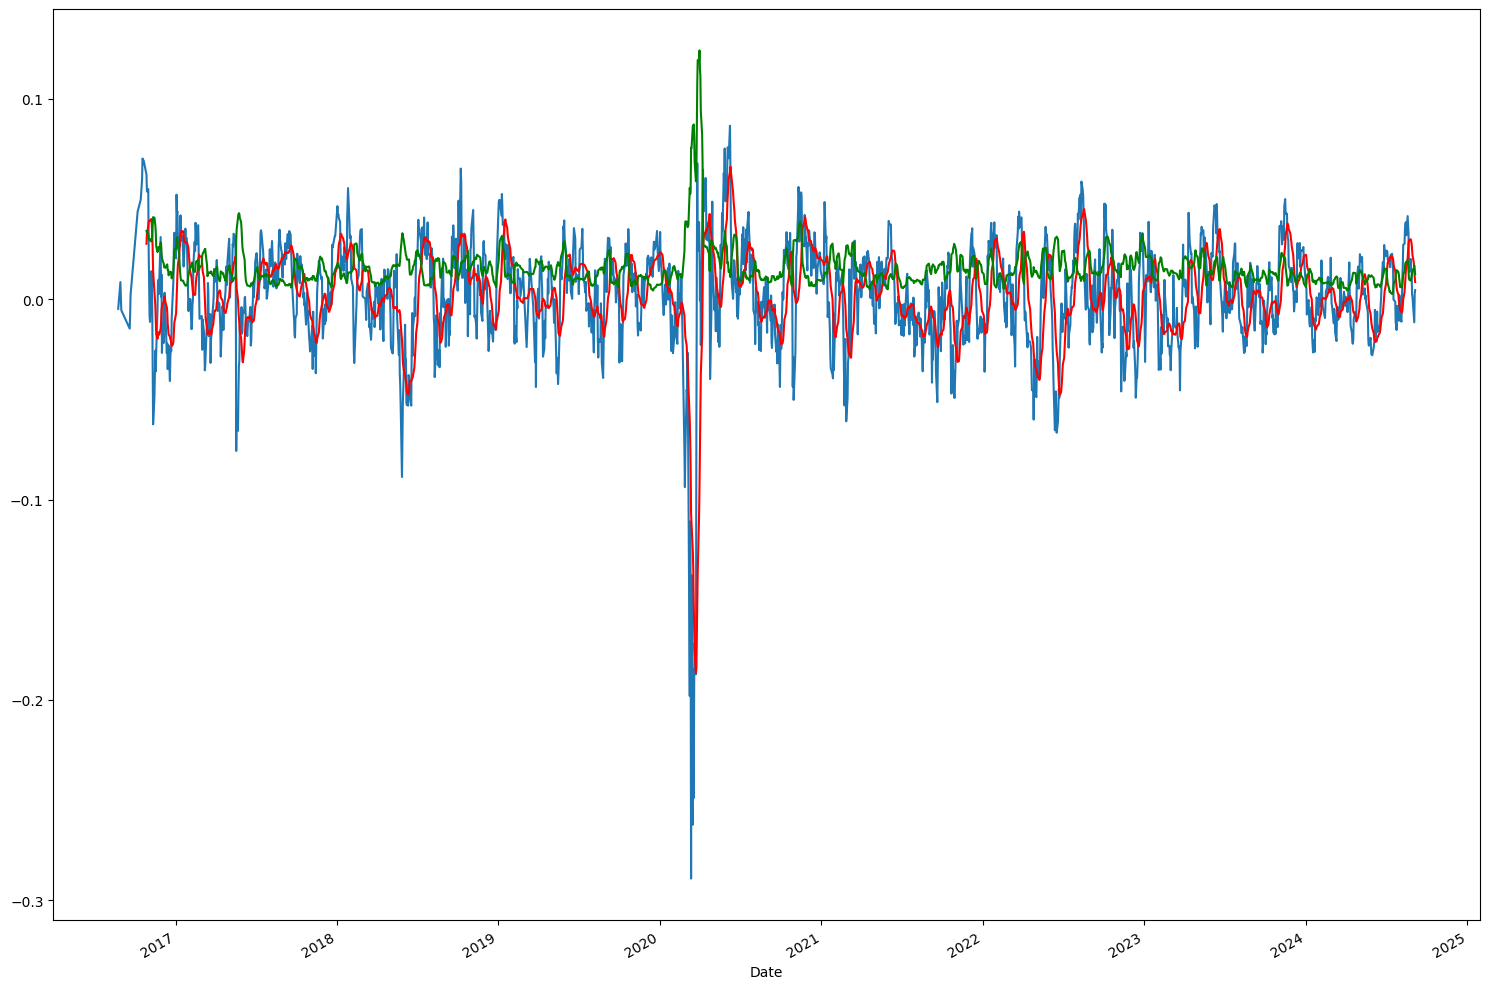

In [73]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots(figsize = (15,10))
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [74]:
X_s = df_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -11.26997369077653
P-Value: 1.5455182232955003e-20
Valores críticos:
	1%: -3.433735729398985
	5%: -2.8630356049379273
	10%: -2.5675662008429145


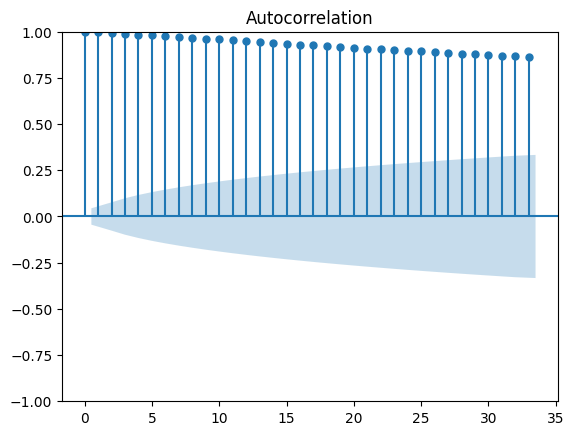

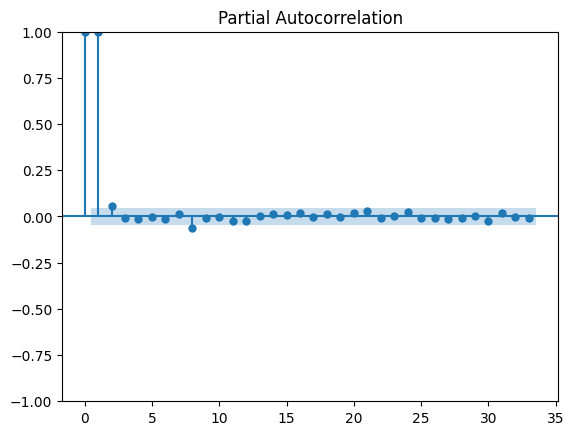

In [75]:
plot_acf(ibov_df_close)
plot_pacf(ibov_df_close)
plt.show()

In [76]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [77]:

ibov_df_close = pd.DataFrame(ibov_df_close)
ibov_df_close['ds'] = ibov_df_close.index
ibov_df_close['unique_id'] = 'ibov'

In [78]:
ibov_df_close

,Close,ds,unique_id
Date,,,
2016-08-01,57.250000,2016-08-01,ibov
2016-08-02,56.650002,2016-08-02,ibov
2016-08-04,57.590000,2016-08-04,ibov
2016-08-05,57.660000,2016-08-05,ibov
2016-08-09,57.680000,2016-08-09,ibov
...,...,...,...
2024-08-30,138.699997,2024-08-30,ibov
2024-09-02,137.500000,2024-09-02,ibov
2024-09-03,137.070007,2024-09-03,ibov


In [79]:
ibov_df_close = ibov_df_close.rename(columns={'Close':'y'})

In [80]:
treino = ibov_df_close.loc[ibov_df_close['ds'] < '2034-01-01']
valid = ibov_df_close.loc[ibov_df_close['ds'] >= '2024-01-01']
h = valid['ds'].nunique()

C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: nan%


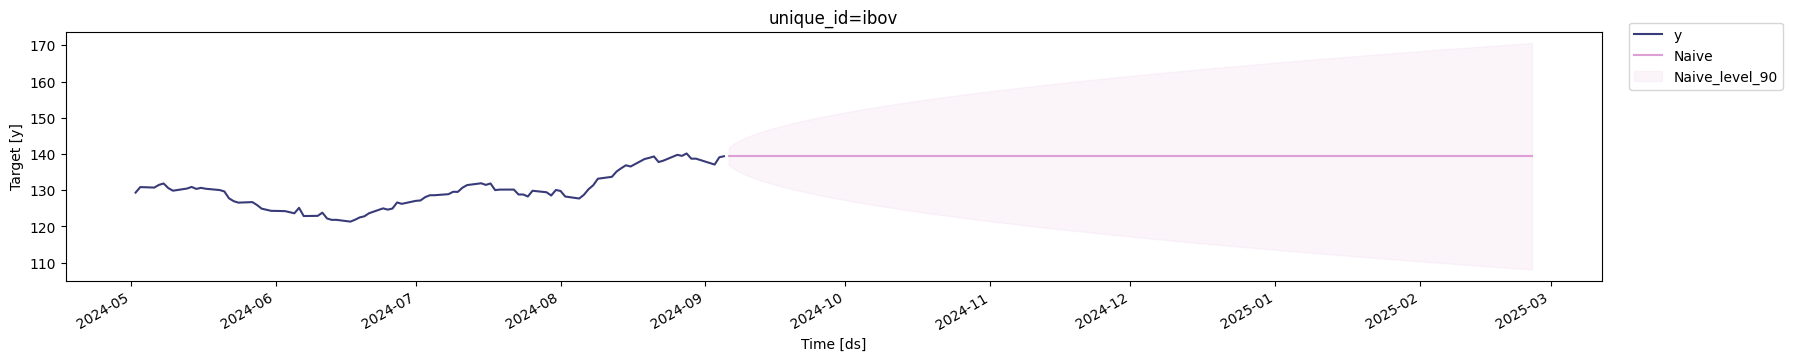

In [81]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90],engine ='matplotlib', max_insample_length=90)


C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: nan%


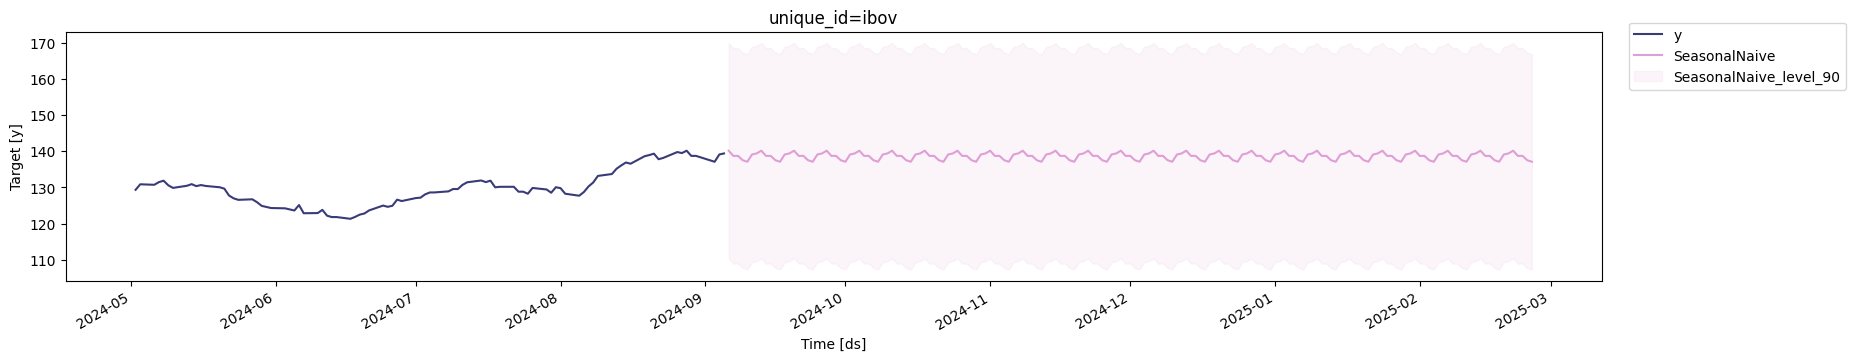

In [82]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90],engine ='matplotlib', max_insample_length=90)

C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: nan%


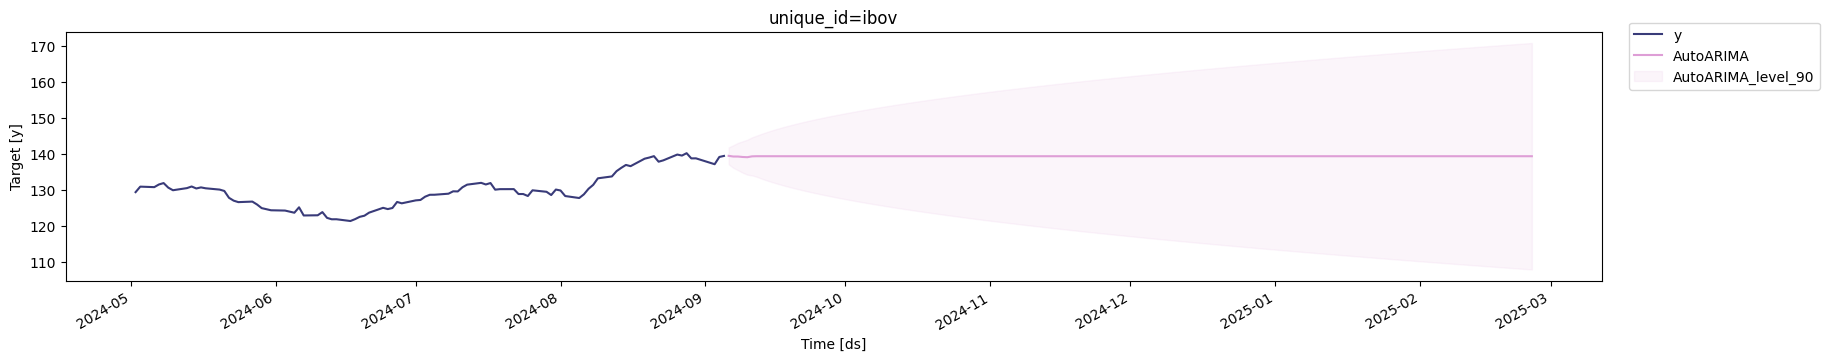

In [83]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada/ MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90],engine ='matplotlib', max_insample_length=90)

In [84]:
ibov_df

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2016-08-01,57.250000,57.250000,57.250000,57.250000,0,2016-08-01
2016-08-02,56.650002,56.650002,56.650002,56.650002,0,2016-08-02
2016-08-04,57.590000,57.590000,57.590000,57.590000,1000,2016-08-04
2016-08-05,57.500000,57.660000,57.500000,57.660000,1060,2016-08-05
2016-08-09,57.680000,57.680000,57.680000,57.680000,1000,2016-08-09
...,...,...,...,...,...,...
2024-08-30,137.339996,138.929993,137.339996,138.699997,2424303,2024-08-30
2024-09-02,138.300003,138.410004,137.259995,137.500000,1435484,2024-09-02
2024-09-03,138.240005,138.240005,136.850006,137.070007,1791073,2024-09-03


C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequenc

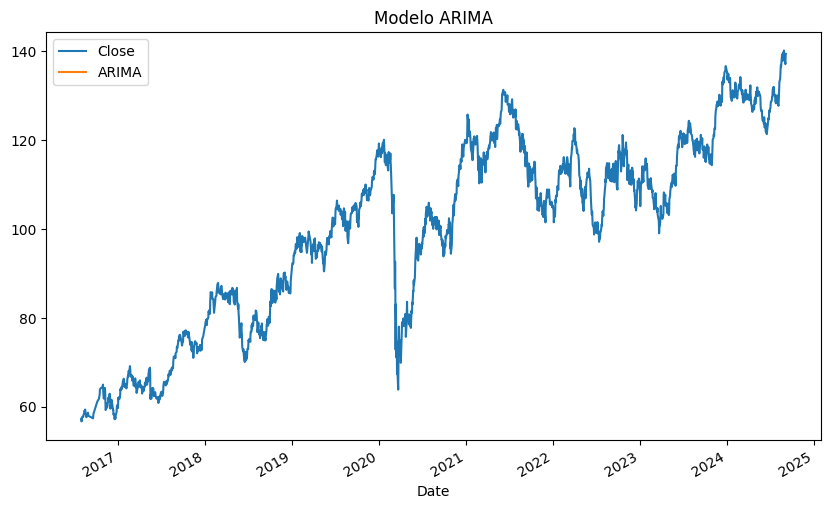

In [86]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustando o modelo ARIMA
model = ARIMA(ibov_df["Close"], order=(1, 1, 2))
model_fit = model.fit()
ibov_df["ARIMA"] = model_fit.predict(start=1, end=len(ibov_df), typ="levels")

# Plotando os resultados
ibov_df[["Close", "ARIMA"]].plot(title="Modelo ARIMA", figsize=(10, 6))
plt.show()

In [87]:
ibov_df[["Close", "ARIMA"]]


,Close,ARIMA
Date,,
2016-08-01,57.250000,NaN
2016-08-02,56.650002,NaN
2016-08-04,57.590000,NaN
2016-08-05,57.660000,NaN
2016-08-09,57.680000,NaN
...,...,...
2024-08-30,138.699997,NaN
2024-09-02,137.500000,NaN
2024-09-03,137.070007,NaN


C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given

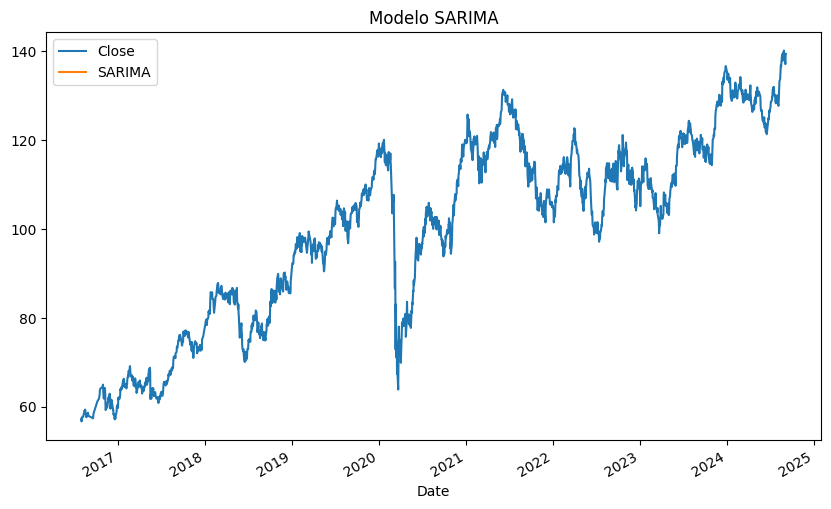

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustando o modelo SARIMA
model = SARIMAX(ibov_df["Close"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
ibov_df["SARIMA"] = model_fit.predict(start=1, end=len(ibov_df))

# Plotando os resultados
ibov_df[["Close", "SARIMA"]].plot(title="Modelo SARIMA", figsize=(10, 6))
plt.show()

In [90]:
ibov_df[["Close", "SARIMA"]]

,Close,SARIMA
Date,,
2016-08-01,57.250000,NaN
2016-08-02,56.650002,NaN
2016-08-04,57.590000,NaN
2016-08-05,57.660000,NaN
2016-08-09,57.680000,NaN
...,...,...
2024-08-30,138.699997,NaN
2024-09-02,137.500000,NaN
2024-09-03,137.070007,NaN


In [107]:
 from prophet import Prophet

In [92]:
ibov_df_close[['ds', 'y']] = ibov_df[["Date", "Close"]]

In [95]:
del ibov_df_close['unique_id']

In [96]:
ibov_df_close

,y,ds
Date,,
2016-08-01,57.250000,2016-08-01
2016-08-02,56.650002,2016-08-02
2016-08-04,57.590000,2016-08-04
2016-08-05,57.660000,2016-08-05
2016-08-09,57.680000,2016-08-09
...,...,...
2024-08-30,138.699997,2024-08-30
2024-09-02,137.500000,2024-09-02
2024-09-03,137.070007,2024-09-03


In [102]:
ibov_df_close_train = ibov_df_close.loc[ibov_df_close['ds'].astype(str) < '2024-01-01']
ibov_df_close_train

,y,ds
Date,,
2016-08-01,57.250000,2016-08-01
2016-08-02,56.650002,2016-08-02
2016-08-04,57.590000,2016-08-04
2016-08-05,57.660000,2016-08-05
2016-08-09,57.680000,2016-08-09
...,...,...
2023-12-21,134.410004,2023-12-21
2023-12-22,135.119995,2023-12-22
2023-12-26,135.699997,2023-12-26


In [104]:
ibov_df_close_test = ibov_df_close.loc[ibov_df_close['ds'].astype(str) >= '2024-01-01']
ibov_df_close_test

,y,ds
Date,,
2024-01-02,135.169998,2024-01-02
2024-01-03,135.270004,2024-01-03
2024-01-04,133.570007,2024-01-04
2024-01-05,134.460007,2024-01-05
2024-01-08,134.830002,2024-01-08
...,...,...
2024-08-30,138.699997,2024-08-30
2024-09-02,137.500000,2024-09-02
2024-09-03,137.070007,2024-09-03


In [108]:
m = Prophet()
m.fit(ibov_df_close_train)  # df is a pandas.DataFrame with 'y' and 'ds' columns

20:13:00 - cmdstanpy - INFO - Chain [1] start processing
20:13:02 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
# use the model to make a forecast
future = m.make_future_dataframe(periods=365)
future = m.predict(future)

In [ ]:
ibov_df_close_test['y'] = ibov_df_close_test['y']/

C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


KeyError: 'yhat_lower'

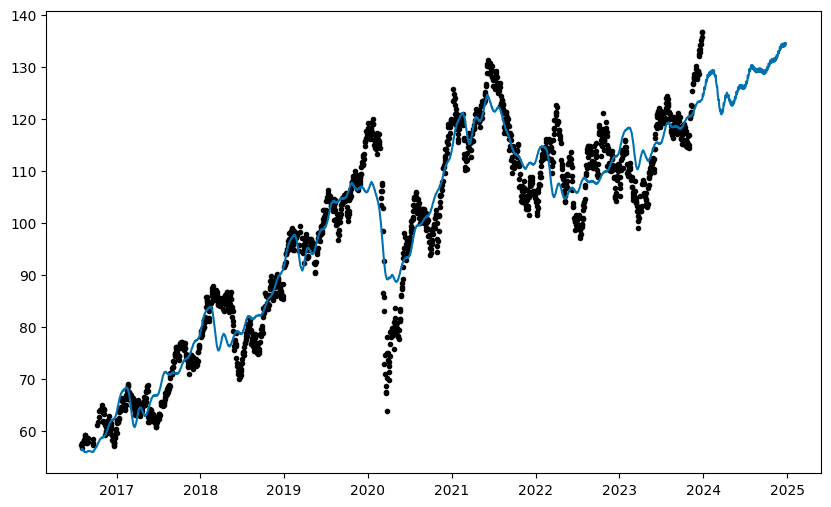

In [125]:
m.plot(future)
plt.plot(ibov_df_close_test['y'], color='red')

In [127]:
future = future[['ds', 'yhat']]
future

,ds,yhat
0,2016-08-01,56.477997
1,2016-08-02,56.534907
2,2016-08-04,56.442549
3,2016-08-05,56.550511
4,2016-08-09,56.279527
...,...,...
2140,2024-12-23,133.988869
2141,2024-12-24,134.111869
2142,2024-12-25,134.163941
2143,2024-12-26,134.220735


In [137]:
future = future.loc[future['ds'].astype(str) >= '2024-01-01']
future.set_index('ds', inplace=True)
future

,yhat
ds,
2024-01-01,124.323297
2024-01-02,124.551810
2024-01-03,124.707338
2024-01-04,124.863570
2024-01-05,125.198371
...,...
2024-12-23,133.988869
2024-12-24,134.111869
2024-12-25,134.163941


In [138]:
del ibov_df_close_test['ds']

In [141]:
ibov_df_close_test = pd.merge(ibov_df_close_test, future, how='left', left_index=True, right_index=True)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [142]:
ibov_df_close_test

,y,yhat
Date,,
2024-01-02,135.169998,124.551810
2024-01-03,135.270004,124.707338
2024-01-04,133.570007,124.863570
2024-01-05,134.460007,125.198371
2024-01-08,134.830002,125.656841
...,...,...
2024-08-30,138.699997,129.164936
2024-09-02,137.500000,129.049710
2024-09-03,137.070007,129.115506


In [144]:
r2_score(ibov_df_close_test['y'], ibov_df_close_test['yhat'])

-1.0792956696078537

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [156]:

from math import floor,ceil,sqrt

In [163]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    print(r2_score(valid['Close'], valid['Predictions']))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

    

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (1465, 1)
Shape of Validation Set (488, 1)


C:\Users\Gustavo_SantosdePaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1425/1425 - 34s - 24ms/step - loss: 0.0029
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
RMSE value on validation set: 2.2166505044061604
-----------------------------------------------------------
-----------------------------------------------------------
0.9479177291668837


C:\Users\Gustavo_SantosdePaul\AppData\Local\Temp\ipykernel_27960\3442646513.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


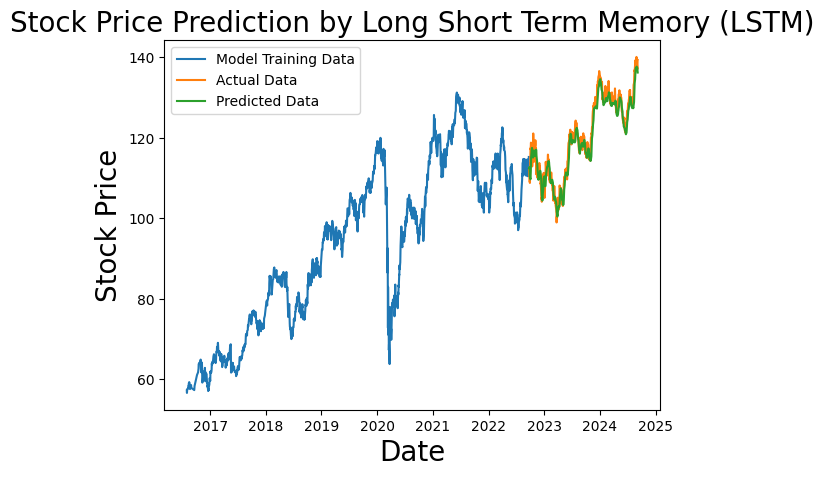

In [164]:
lstm_prediction(ibov_df)